# Context - Purpose
So far in this course you have learned how think of interacting (biological) systems in terms of networks and represent them as network graphs. You have also learned the basic vocabulary associated with the definition of networks (nodes, edges, connectivity matrix...). 

Even though the knowledge of the underlying network architecture relevant to describe a particular biological mechanism is an important **first step**, it is generally **not sufficient** to get a good mechanistic understanding of **how the network stores, gather and processes signals and information**. 

Some nodes can, indeed, be activated or inactivated at different times and how the network **appears** from outside may depend on which signal is being processed by the network. Thus, a network is inherently a **dynamic object** where time and often space (e.g. cellular compartmentalization) are relevant to understand which output can be expected given an input. From a modern biomedical perspective, the range of dynamical behaviors that complex biological networks offer are the basis of important concepts we are just starting to grasp, such that the concepts of pleiotropy (multiple effects of a single perturbation on many outputs), phenotypic robustness to perturbation, co-morbidities, rewiring... as nicely illustrated in the review by Hu and co-workers:

https://www.nature.com/articles/nrg.2016.87


Pleiotropy and co-morbidities can be expected naturally from the **existence of links between distinct subnetworks within a larger network**: because a single gene or gene interaction can affect, downstream, multiple (sub)networks that control different aspects of cell physiology, a single perturbation can in principle likewise affect multiple phenotypes, including disease phenotypes (co-morbidities). But it is not because a given network offers the possibility for pleiotropy that pleiotropy will indeed be **dynamically achieved**. The notion of phenotypic robustness to perturbation is linked to how a given **network structure or achitecture** has been designed by Evolution tobe capable of **buffering against perturbation in network parameters or even some network links**. As a consequence, when network robustness is there, simple perturbation are insufficient to generate a strong phenotypic perturbation (disease state) and disease emergence requires **network rewiring**, i.e. a modification of the network architecture itself that lowers the robustness. 

Pleiotropy and even more, robustness, are **hard to predict just looking at the network structure**. They emerge from dynamical proporties of the network. So the key question underlying the analysis of biological networks is: **What output can we expect from a biological network in response to a given input signal?**


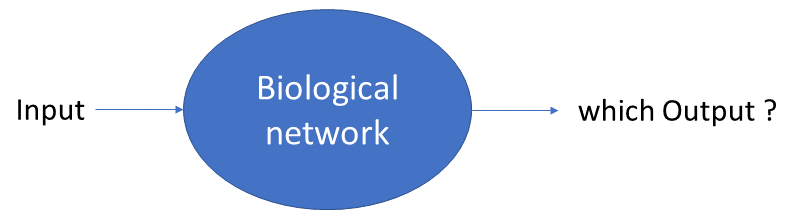


But one good thing is that elementary network motifs that, together, are the alphabet from which more complex network are made of, have pretty universal dynamic properties.

In this notebook, we are presenting the dynamical properties of some basic but frequently encountered **elementary network motifs**. Assembling those prototypical responses ("logic functions") is helpful to predict the overall behavior of bigger, more complex networks. 

## Basic network motifs and their "logic" functions
Uri Alon worked a lot towards the understanding of basic network motifs in real-world biology, so we'll start from one of his review papers to discuss some key concepts. The paper is available here

https://www.nature.com/articles/nrg2102

but the main points are discussed below. In this work, Uri Alon is interested in **gene expression systems**, so the pointed arrows **----->** in the following mean *activates the expression of* and the bar-ended arrows **----|** mean *represses the expression of*. So in short, A---->B means that the more protein A in the cell, the larger the *synthesis rate* of B and A----|B means that the more protein A in the cell, the lower the *synthesis rate* of B. We stress that when the networks have a different meaning, for instance A is an enzyme and B is the activated state (e.g. phosphorylated) of another protein, the mathematics/the curves are a bit different. We'll discuss this aspect in the second section of this notebook. But overall, the conclusions, concepts and ideas are very similar. 

But because in the Uri Alon work, the nodes represent **proteins amounts**, since each protein has a finite lifetime due to protein degradation, it is **always implicitly assumed that the protein is degraded at a fixed rate per unit protein**. Therefore, the more proteins are present, the more proteins are degraded per unit time. And if the synthesis rate is constant, overtime the more proteins are synthesized the more we tend towards a regime where there is enough degradation to compensate exactly for this synthesis rate and we reach a protein level that is independent of time. The different motifs are then compared with parameters chosen so that **this final, time-independent concentration is the same**. We don't compare apples and oranges here. 

We also stress that since Alon used bacteria for experimental validation of the network motifs dynamics, the time axis is labeled in units of bacterial generations. Bacteria duplicate every 20minutes or so, while the stability of proteins used for the experiments are typically several hours, and therefore proteins **reach saturation within several bacterial generations**. Hopefully this is not too confusing, what matters is that the horizontal axis is just ... **a time axis**. 

So let's start with the beginning: one gene Y activates expression of target gene X.

### Y---->X (case a on the Figure below, blue curve)
At early times, the amount of X increases linearly, and at larger times saturates: this is our *reference* network element. And we'll compare other network elements with this one. 

### X---->X (case c on the Figure below, red curve): positive feedback
What happens if the protein that activates the expression of the gene X is... the gene product, the protein X itself? This network element is called a **positive feedback**: at early times, the amount of X increases **sublinearly**, then the increase gets faster and faster: indeed, the more X has been already produced, the more the expression is activated. **In the absence of any degradation of X**, or other mechanism that would **limit** how much X can accumulate, the positive feedback would lead to an **exponential increase of X**. 

But since here, we compare for equivalent saturation levels, and we find that the **response time**, as defined by the time it takes to reach half of the saturation level, is **larger** for the positive feedback network compared to the Y->X element.  

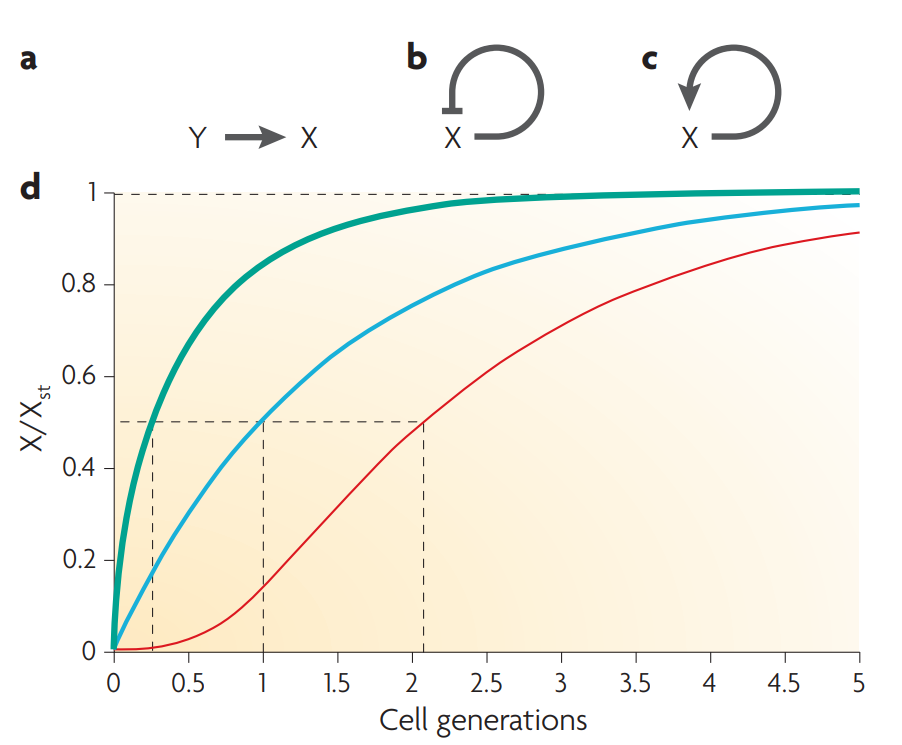

Similar response (similar to positive feedback) is obtained when X is the final downstream target of a chain of gene expression activations $Y_1\rightarrow Y_2\rightarrow \dots \rightarrow X$

### X----|X (case b on the Figure above, green curve): negative feedback
If the gene product now **inhibits** its own expression, the network element is called a **negative feedback**. And because the rate of synthesis **diminishes** when there is already some protein X produced, the amount of X that is produced at larger times is very small compared to the amount of X produced at early times, **relatively**: hence, again for similar saturation levels compared to the two other elements above, the half saturation level is reached over **shorter times**: the response time of the negative feedback element is faster than linear or positive feedback elements. The amount of X increases **superlinearly** at early times. Unlike genes X under the control of other genes Y, or under *positive* control of themselves, **genes that are under negative feedback control do not require other mechanisms to saturate**: this network element offers naturally the potential for **self-regulation**. 

### What about robustness? 
In addition to providing faster, more *step-like* responses, negative feedback (or negative auto-regulation) also reduces the cell-to-cell variability in protein expression that could arise from variability in the synthesis rates (see below, compare green curve with blue and red). 

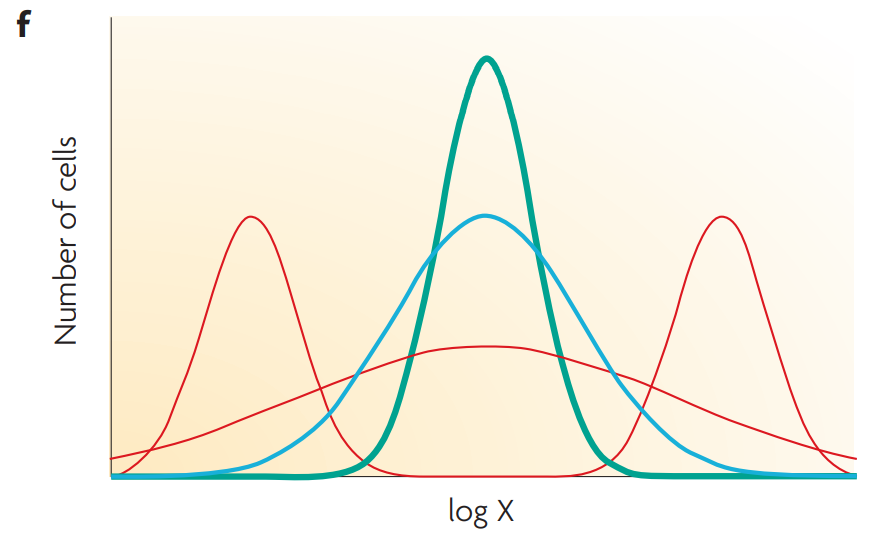

This means that if there is variability in the network parameters (synthesis rates), the **negative feedback network architecture reduces the variability in network output** (the proteins): hence this network architecture buffers **against** variability, and provides **robustness** to the network. 

### Feedforward loops
We term **feed-forward loops** or FFLs network elements where one single protein X can affect the expression of another protein Z, either directly or via a third gene/protein Y, as summarized in the array below. 

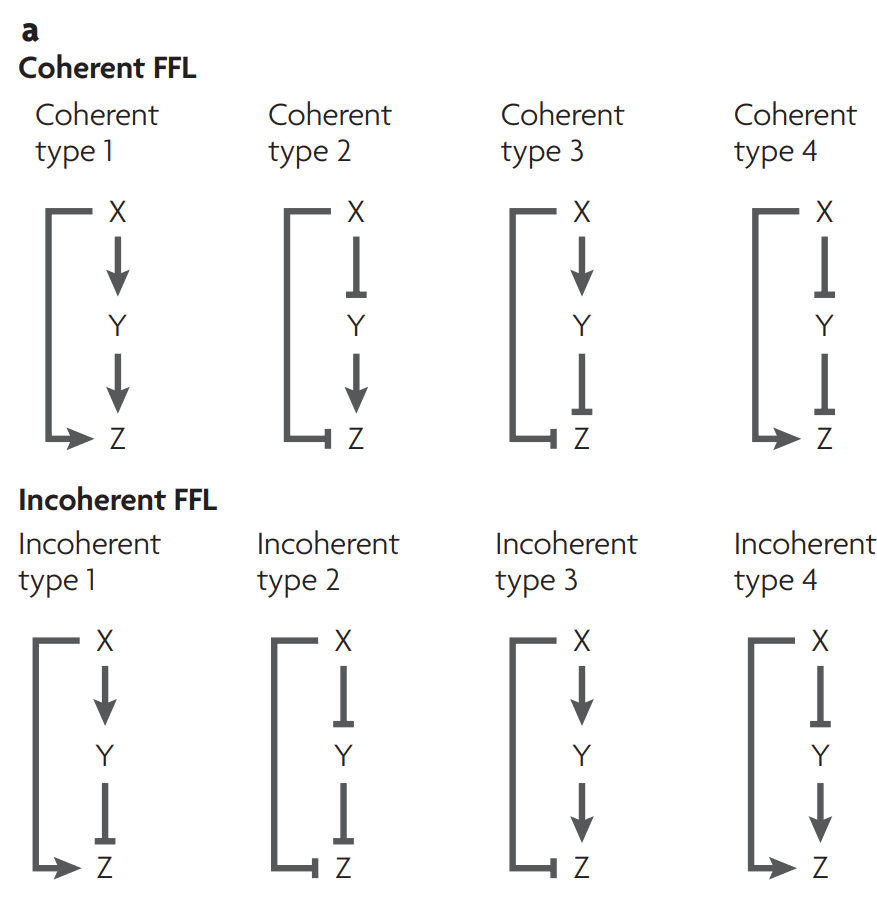

We distinguish **coherent FFL** from **incoherent FFL**: in the former case, the two ways protein X affect the expression of Z are qualitatively *equivalent* (i.e., both "routes" activate Z, or both "routes" inhibit Z); in the latter case, the two ways protein X affect the expression of Z are qualitatively *opposite* (i.e., one yields Z activation and the other, Z inhibition). 

We stress that in addition to the 8 different types of loops shown above, there is another distinction to make: whether **both** inputs are required to express Z (in this case we say that the promoter of Z performs an **AND** function), like for instance X and Y are two subunits of one transcription activation complex; or when either one input or the other is sufficient to express Z, in which case we say that the promoter of Z performs an **OR** function. We won't see all 16 possible cases, just pick the two examples that are the most frequently found in gene regulation networks in microorganisms! 


### Coherent Feedforward loops with "AND"
Let's start with the first coherent FFL where X activates Z directly and via another player Y (C1-FFL). 

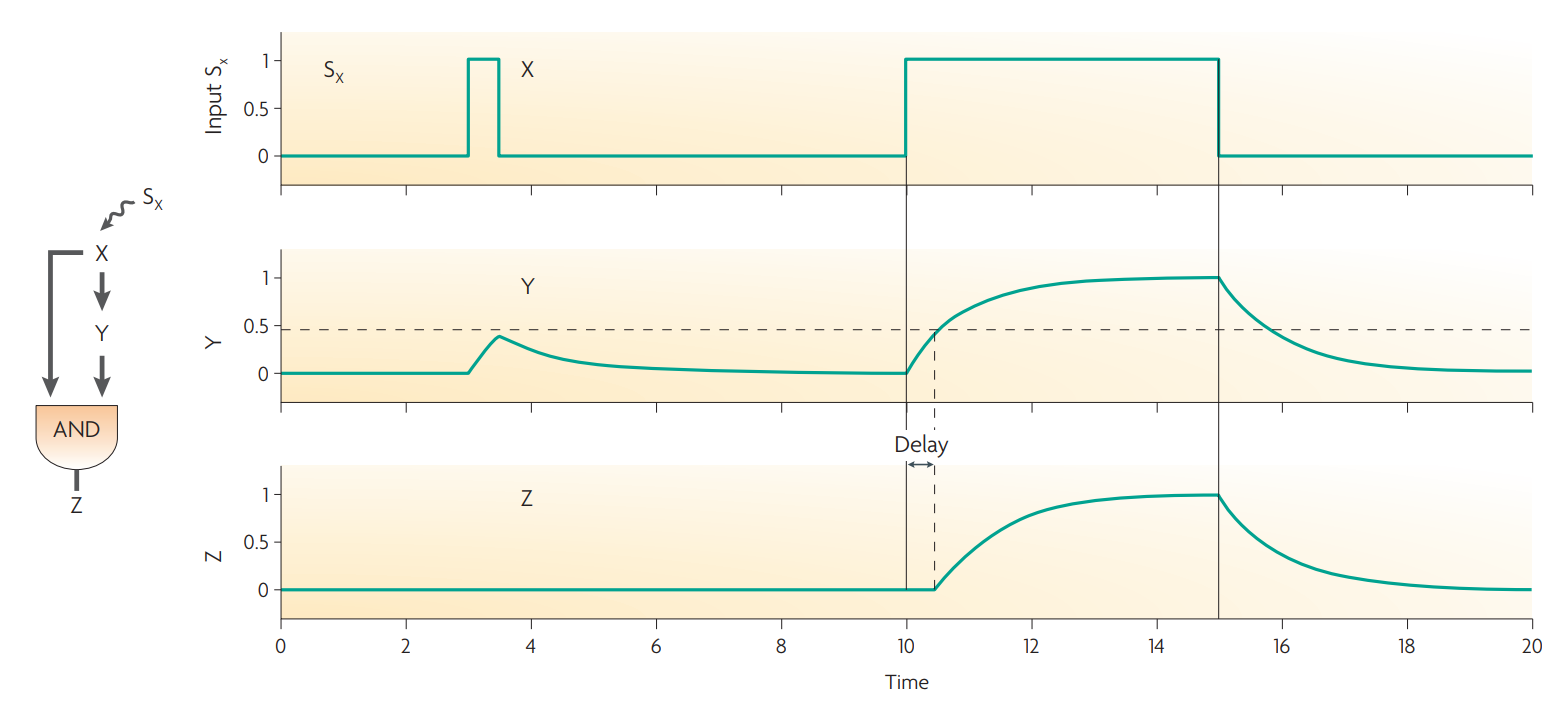


Because here the FFL is coupled to a **AND** function, i.e. both X and Y need to be present for Z expression to be achieved, this network elements **filters out short pulses in X expression**. Indeed, denoting $S_X$ the upstream signal that initiates the expression of protein X, a short impulse in $S_X$ activates the ezxpression of X immediately but some X needs to accumulate for some time before Y is induced, leading to some more delay in Y build-up. Hence, if the $S_X$ signal is not long enough, Y never exceeds the basic threshold level to activate Z and the levels of Z remain negligible. 

We note that this delay in setting up the response Z in the FFL with AND logic is not present upon stimulation arrest: when the stimulation $S_X$ stops, the Z protein levels start decaying immediately. 


### Coherent Feedforward loops with "OR"

In the case of the C1-FFL, if the expression of Z responds to an OR logic (i.e., presence of rthe X *or* Y protein is sufficient for Z expression), then there is **no delay** in the response trigger, but there is in contrast a **delay in the suppression of Z upon arrest of the $S_X$ stimulation**. And therefore, just like the coherent FFL with AND logic buffers against short signals $S_X$ that could arise, for instance, from molecular noise, the FFL with AND logic buffers against short **drops** in stimulation signal. 

So in summary, to some extent C1-FFL is a **pulse eliminator**, that eliminates short pulses in inputs when Z responds to an AND logic, and eliminates short drops in input when Z responds to an OR logic.

### Incoherent Feedforward loop
For incoherent FFL, since the two inputs on Z are opposite, it does not make any sense to talk about OR logic. 
And in contrast with coherent FFLs, the first incoherent FFL (I1-FFL) where X activates Z and Y, but in return Y inhibits Z, acts as a **pulse generator**: upon stimulation of X by $S_X$, Z is first expressed directly in response to the growing X signal. But the latter also leads to accumulation of the Z inhibitor Y, with some delay, so that when the expression of Y kicks in, it starts reducing the levels of Z.

Thus, in short, Z levels increase and then decrease, leading to a pulse-like respond of Z to sustained stimulation of the network $S_X$.

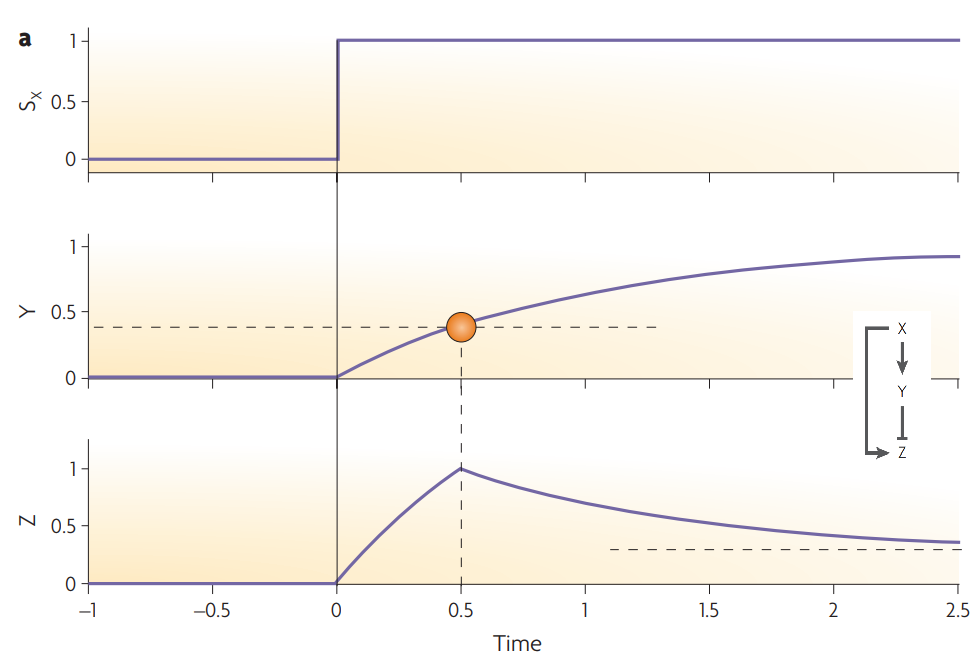




### Feedforward loops and memory
With additional feedback interaction between target genes, feedforward loops can lead to memory effects. We consider the situation where a burst in gene Z activates two target genes X and Y, and that in return X activates Y and vice versa. This is a situation where we have two imbricated FFL loops (Z->X + Z->Y->X on one side, and Z->Y + Z->X->Y on the other side). 
This network element generates **memory**: a short impulse in Z **activates the feedback loop between X and Y**, which stabilizes on the long term, generating a memory of the initial pulse. 

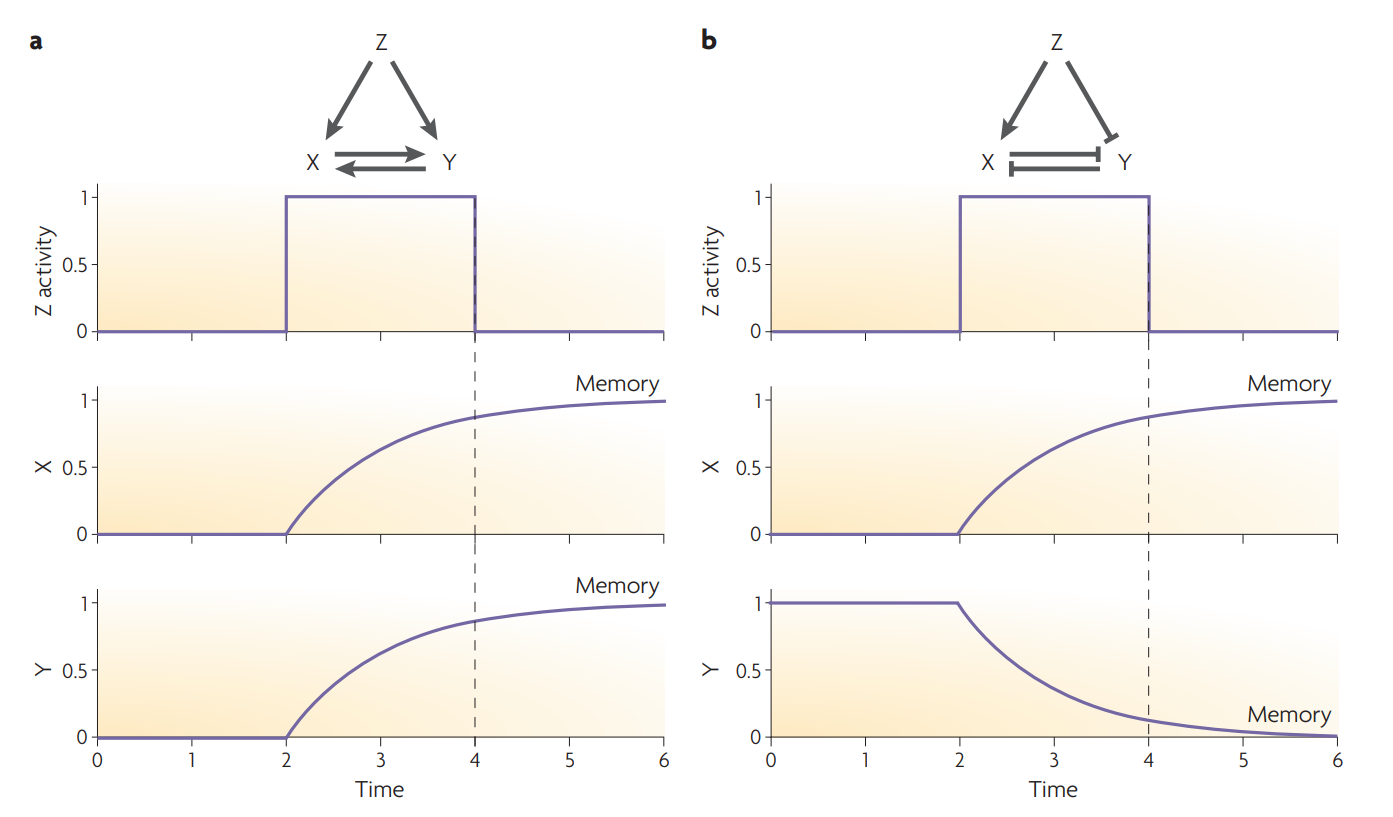


Likewise, if X and Y interact via negative feedback, a short impulse in Z also generates memory but two different output states are possible (X up, Y down, or conversely). A similar result is obtained if Z **inhibits** one of the two target genes and **activates** the other, as illustrated in the Alon paper. 



## Detection of elementary network motifs in large biological networks (optional)
Now that we know what basic motifs are doing, the next step - and it is a diffcult one! - is to **recognize these motifs in more complex networks.** Mastering this task requires some experience, and is beyond the scope of this course. However, we felt it was important to present some methods and general ideas, and provide some resources/keywords to get you started in case you face this challenge in your projects. 
One first possibility is to use **network analysis tools** to compute network topological metrics that provide a reduced list of the most important nodes and edges: 

- Centrality analysis aims to estimate how central each node is to a network. Under the assumption that central nodes are more important to the network dynamics than peripheral nodes, this can be used to simplify networks. Centrality can be *local* for nodes with high connectivity to nearest neighbors, or *global* for nodes that belong to modules that are highly interconnected with other modules. 

- Distance analysis analyzes the distribution of node-2-node distances along the network. This analysis reveals how compact a network is, and less compact networks often show multiple compact subnetworks (which can be functional modules). 

- Flux Balance Analysis aims to identify the dynamical steady states of a network given the network constraints (for instance, the edges represented overall by a stoichiometry matrix). In the steady state, the network is overall balanced and its response does not change anymore with time, yet some local edges might be **active** even in steady state and there are reaction fluxes in the network. These fluxes can be computed from the analysis of the stoichiometry matrix (eigenvalues, eigenvector analysis). And other reactions, that correspond to no steady-state fluxes, can be ignored if we're interested in the response of the network at large times only (and not the transient states). 

These are just a few examples of simple approaches that can be used to simplify complex networks and break them down to eementary modules as discussed above. We stress that in order to obtain structural information on the network from all these metrics, we need to compare those metrics with those of an equivalent network but with a random structure (network randomization). 

Then, there are computer-based tools that offer the possibility to identify **functional modules and elementary motifs** within networks, including the simplified methods after performing the first step above. These tools have been recently reviewed (https://ietresearch.onlinelibrary.wiley.com/doi/epdf/10.1049/iet-syb.2020.0004) and new tools are continuously developed, to help us in this task. We stress that a great care is required when doing so, since bad simplifications in networks structures can lead to confounding data intepretation. So it is always safer to use multiple tools, different approaches, in order to evaluate how they overlap in terms of elementary motifs identification. It is also worth mentioning that some on-going research aims to assess the performance of different motif-identification algorithms (for instance https://www.nature.com/articles/s41592-019-0509-5).


# Exercise: spontaneous oscillations generation by the Repressilator
In this second section of this notebook, we will see how we can **demonstrate** the fundamental signal-processing properties of network elements, of the type discussed in the first section. The methods we use here can be applied to study the dynamics of any network, though they are easier to implement on small network motifs than on bigger and more complex networks.

In this exercise, the elementary network motif we consider is the **Repressilator** model of a biological oscillator, proposed by Michael Elowitz and Stanislas Leibler 20 years ago and published in Nature: 

https://www.nature.com/articles/35002125

Of course we could read the article and comment on Elowitz's model. And we'll do. But we'll do better: we'll **build** our own repressilator model and demonstrate **why** it is a basic network motif to generate spontaneous oscillations. 

Elowitz & Leibler idea was to demonstrate that a triple negative feedback loop, analogous of the **Rock-Paper-Scissor** game where the Rock inhibits the Scissor, that inhibits the Paper that itself inhibits the Rock, was sufficient to produce **oscillations** and explain the functioning of biological clocks (such that the circadian clock). And in order to demonstrate this experimentally, they used a set of 3 **reciprocally self-inhibiting genes** that have nothing to do with biological clocks in principle. They synthetically expressed these genes in *Escherichia coli* bacteria and showed that this minimal biological circuit was sufficient to induce biological oscillations. But we're not discussing the experimental evidence here, but the **mathematical model** which they used to predict that this synthetic system would be sufficient to generate the oscillations, and under which conditions it would be.  

The system is better described in this video, in particular between t=11min12s and t=14min:
https://www.youtube.com/watch?v=NxPcIQsscoE

How would we construct such a mathematical model?



# Model construction
First, we need to pick the model ingredients (model objects), the features accounted for for each object, how these features interact together (e.g. how feature 4 of object 1 affects feature 3 of object 2)... but also the type of modeling that we think would correspond to the experimental reality. 

## Model architecture, ingredients, general approach
The biological system deals with 3 gene products, the proteins $TetR$, $\lambda cI$ and $LacI$ that **inhibits their own production** in a cyclic fashion. To simplify, we'll rename the three proteins **Rock, Paper and Scissors or RPS**. 

From a modeling perspective, then, the only ingredients/model objects are the three proteins R, P and S. In terms of features to account for, what does **really matter** in the biological system we are studying? The model is supposed to make predictions that can be compared with the experiments performed in the Elowitz study, which we can see at time=14min on the videos (oscillations of the number of proteins per cell). So our model **must** include the number of each protein as a feature. In addition, the number of proteins, or their density, is also the parameter that is **relevant for the inhibition of the production of the other proteins** (e.g., the more Rock proteins, the les Scissors will be produced. So this is a feature to account for, for each protein it's population. But **is there anything else?** Do we need to account for any other parameter of the proteins to discuss the oscillations at first sight? No. 

So the model architecture is something like:

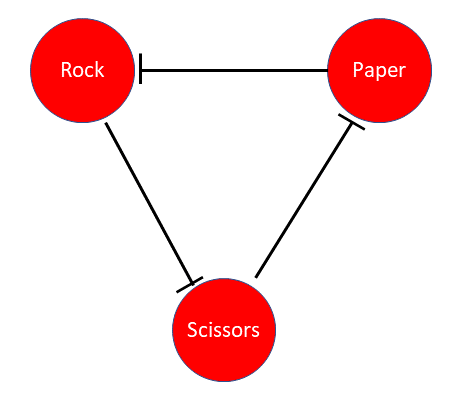

where the **inhibiting arrows -----|** mean, literally, **inhibits the synthesis of**. And because we want to keep things simple to start, we imagine that we have enough proteins of each type inside the cell so that individual synthesis/degradation events have little influence on the overall protein density, and therefore we use the continuun approximation and we start with an ODE framework to describe the system.

So let's include in our model: The R, P, S proteins, and their total number denoted $r$, $p$ and $s$ respectively. 


## Model equations
As would fans of old-fashioned heavy metal say: "Welcome to the jungle."
Indeed, **inhibits the synthesis of** can be implemented in a **number of quantitative ways**, and in principle all of them could be reasonable tested. We'll see a few options, and then discuss the option Elowitz and Leibler have chosen. 

We stress that in some situations there exist a **microscopic mechanistic model** that provides insight on how an *inhibition* or an *activation* (in the broad sense) must be mathematically formulated. For instance, the Michaelis-Menten law provides a mathematical formulation of the conversion rate of a substrate into a product by an enzyme, or a Hill function explicits how the concentration in kinase mathematically affects the activation of a protein upon multi-side phorphorylation. In some other situations we have enough biological knowledge at the mechanistic level to formulate ourselves a model of a particular *inhibition* or *activation*. But in this particular case of a triple negative feedback Repressilator, we don't know *a priori* how much a given number of Paper protein inhibits Rock synthesis, so the choice is ours. 

Hence, **what is the most simple way** to formulate that the rate of synthesis of one protein (negatively) depends on the concentration (or total population) of another protein?

By using a linearly decaying synthesis rate: for instance, the synthesis rate of Rock linearly decays as a function of the number of Papers present at a given instant of time: 

$$\text{Rock synthesis rate}=\alpha_r-k_{p\rightarrow r}*p$$

where $\alpha_r$ is the basal synthesis rate of Rock in absence of Paper, and $k_{p\rightarrow r}$ is the rate of inhibition, per unit Paper protein. Denoting $d_r$ the degradation rate of the Rock protein per unit protein (i.e., the probability of degradation of each Rock protein per unit time), we get

$$\text{Rock degradation rate}=d_r*r$$

How much does the number of rock protein per unit time? Applying what we have learned in MMBS1, we can write the following balance equation:

$$\frac{dr}{dt}=\text{Rate of change of r}=\text{Rock synthesis rate}-\text{Rock degradation rate}$$

and we get, after replacing each term by its value as a function of the model variables and parameters:

$$\frac{dr}{dt}=\alpha_r-k_{p\rightarrow r}*p-d_r*r$$

Reasoning the same way, we get similar equations (ordinary differential equations, ODEs) for the Paper and Scissor proteins:

$$\frac{dr}{dt}=\alpha_r-k_{p\rightarrow r}*p-d_r*r \\ \frac{dp}{dt}=\alpha_p-k_{s\rightarrow p}*s-d_p*p \\ \frac{ds}{dt}=\alpha_s-k_{r\rightarrow s}*r-d_s*s $$

We can remark that this system is **linear**, since each equation features only constants ($\alpha_r,\alpha_p,\alpha_s$) and **first-order polynomial functions** of the unknown functions $r(t)$, $s(t)$, and $p(t)$. We can write this system of equations in matrix form:

$$\frac{d X}{dt}=-A*X+X_0$$

where $X(t)=\begin{bmatrix} r(t) \\p(t) \\s(t) \end{bmatrix}$ is the **unknown vector**, $X_0=\begin{bmatrix} \alpha_r \\\alpha_p \\\alpha_s \end{bmatrix}$ is a right-hand side constant vector and the system's matrix is:

$$A=\begin{bmatrix} d_r & k_{p\rightarrow r}&0 \\ 0& d_p & k_{s\rightarrow p} \\ k_{r\rightarrow s}& 0 & d_s \end{bmatrix}$$

This formulation of the model will be our **FORMULATION #1**. 

Before embarking on the resolution of this system, let's look carefully at the equations and to some self-criticism. For instance, let's look at the equation for the Rock protein:

$$\frac{dr}{dt}=\alpha_r-k_{p\rightarrow r}*p-d_r*r$$

We can remark that there are three terms on the right hand side: the (constant) synthesis term (rate $\alpha_r$), and two terms that tend to effectively **reduce** the population of rock proteins (negative contribution to $dr/dt$: the degradation rate $-d_r*r$ and the "synthesis inhibition" term, $-k_{p\rightarrow r}*p$. The former term vanishes when $r \rightarrow 0$ (it is impossible to degrade Rock proteins if there are no Rock proteins). Hence, this term cannot lead to a silly regime where the number of rock proteins would be negative. In contrast, the second term $-k_{p\rightarrow r}*p$ can be negative even in a regime where there is already no more Rock proteins left ($r=0$). In particular, if we are in a state where $r=0$ and $p$ is large enough so that $k_{p\rightarrow r}*p>\alpha_r$, then

$$\frac{dr}{dt}<0$$

even if $r=0$!! Hence, a few instants later, there would be a **negative number of Rock proteins....**! 

Hence, our model as it is written does **not guarantee the positivity of the $r$, $p$ and $s$ variables.**

Are there better quantitative characterizations of the statement  **Paper protein inhibits the synthesis of Rock protein**?

## What if?
What is we **choose a different way to represent this statement?** For instance, we could have a synthesis rate that is **inversely proportional** to the concentration of Paper proteins:

$$\frac{dr}{dt}=\alpha_r/p-d_r*r$$

In this formulation of the model,  $\frac{dr}{dt}$ cannot become negative if $r=0$ and, provided the other equations are formulated the same way, this would guarantee the positivity of the protein counts $r$, $p$ and $s$. However, we stress that for very low Paper protein count $p \rightarrow 0$, the synthesis rate would become very, very large. Is this realistic, is there some basal Paper level that prevents Rock synthesis rate to diverge? 

Thinking twice about it, **any mathematical function $f_p(p)$ that goes from 1 to 0 when $p$ goes from 0 to $\infty$** would work!

$$\frac{dr}{dt}=\alpha_r*f_p(p)-d_r*r$$

This would ensure that the Rock synthesis rate is maximal (equal to $r_0$) when there is no Paper present, and that is vanishes when $p\rightarrow \infty$ (still remaining infinitely positive), which would perfectly implement the statement **Paper inhibits Rock expression**. 

For instance, 

$$f_p(p)=e^{-\frac{p}{p_0}}$$

where $p_0$ is some cutoff Paper concentration would be a possible formulation. 

Opening a bracket: we stress here that those formulations do only include the expression level of $p$, because in our current situation  the **inhibiting arrows -----|** mean **inhibits the synthesis of**. Another frequent situation is when -----| mean simply **inhibits**, in the sense **decreases the activity of**, or **inactivates**. In this case, the function $f_p$ must also depend on the **amount of active $r$** because you cannot inactivate an inactive $r$, and the ODE shall be written for e.g. *active* $r$ and would look like

$$\frac{dr_{active}}{dt}=\alpha_r*f_p(p,r_{inactive})-d_r*r_{active}$$

where $f_p(p,r_{inactive})=0$ if $r_{inactive}=0$. Closing the bracket. 


A very popular choice of function when we have to represent mathematically an *inhibition* or *activation* without mechanistic knowledge to infer a proper formula is a **Hill curve** of the type:

$$f_p(p)=\frac{1}{1+\Big( \frac{p}{p_0}\Big)^n}$$

where $p_0$ is some cutoff Paper expression level and $n$ a Hill coefficient ($n=1,2,3...$). This function is close to 1 when $p \rightarrow 0$, but starts decaying towards $0$ when $p>p_0$. Therefore it models an inhibition. The complementary function $1-f_p(p)=\frac{\Big( \frac{p}{p_0}\Big)^n}{1+\Big( \frac{p}{p_0}\Big)^n}$ would model an activation in an equivalent way. With its 2 parameters, this function is sufficient to account for the absence of inhibitory effect for low expression of $p$ ($p<p_0$) and therefore to account for possible expression thresholds, but also to parametrize how **sensitive** the inhibition is to $p$ when exceeding the threshold. It achieves a **good trade-off** between model complexity (only 2 parameters, not too much) and the wealth of situations it allows to describe (which is good when we lack mechanistic information to better estimate how the inhibition/activation shall be quantified). In addition, it involves only rational fraction of polynomials, and polynomials are mathematical functions for which a lot of methods have been developed, explaining maybe why this Hill formulation is very popular. 

Hence, we will choose such a model for the R---|S, S---|P, and P---|R inhibitions in our RPS problem, and the equations become: 


$$\frac{dr}{dt}=\frac{\alpha_r}{1+\Big( \frac{p}{p_0}\Big)^n}-d_r*r \\ \frac{dp}{dt}=\frac{\alpha_p}{1+\Big( \frac{s}{s_0}\Big)^n}-d_p*p \\ \frac{ds}{dt}=\frac{\alpha_s}{1+\Big( \frac{r}{r_0}\Big)^n}-d_s*s $$





This formulation of the model will be our **FORMULATION #2**. 






## Analysis of Elowitz model


And this is the choice that Elowitz and Leibler made (see Box 1 of the Nature manuscript). Specifically, the Elowitz & Leibler equations are written at the mRNA level (and therefore include 6 ingredients, the RPS proteins and the corresponding mRNAs), and also include some basal gene expression rate even in presence of high concentration of the inhibitory protein, which adds another parameter. Hence, their equation for e.g. Rock mRNA $m_r$ and Rock protein $r$ are (or rather *were*, before any further manipulation): 

$$\frac{dm_r}{dt}=-k_{deg,mRNA}*m_r+\alpha_{r,0}+\frac{\alpha_r}{1+\Big( \frac{p}{p_0}\Big)^n} \\ \frac{dr}{dt}=k_{trans}*m_r-k_{deg,prot}*r$$

Similar equations were written for Paper and Scissors. 

Let's quickly analyze these equation: the second one represents the time evolution of the number of Rock proteins $r$. Rock proteins are **produced** from the Rock mRNA $m_r$ at a (translation) rate of $k_{trans}$ protein made per unit mRNA, so the total protein production per unit time is: $k_{trans}*m_r$. Rock proteins are **degraded** at a rate of $k_{deg,prot}$ per unit protein per unit time, so the total number of proteins degraded per unit time is: $k_{deg,prot}*r$. Nothing else, except synthesis or degradation, can happen to Rock proteins in this model: this is how we get the second equation. But since the second equation makes use of Rock mRNA number, we need an equation for the time evolution of the number of Rock mRNAs, $m_r$. This is the first equation. And it can be analyzed as follows.

Similar to proteins, there is a degradation rate $k_{deg,mRNA}$ per unit time per mRNA molecule, so the total mRNA degradation per unit time is $k_{deg,mRNA}*m_r$. In addition, Elowitz and Leibler assume that the Rock gene promoter is *leaky* and therefore Rock mRNA has a constant synthesis rate of $\alpha_{r,0}$, independent of other factors. And in order to model the fact that the Paper **protein** inhibits the synthesis of the Rock **mRNA** (transcription inhibition), the equation for Rock mRNA includes a third term $\frac{\alpha_r}{1+\Big( \frac{p}{p_0}\Big)^n}$ that is maximal (and equal to $\alpha_r$) in the absence of Paper protein $p=0$, and decays to $0$ when $p\rightarrow \infty$, with a Hill coefficient $n$, as discussed above. 

Interestingly, the authors note in their article that "*More detailed calculations, with non-Hill-function repression curves, or using thermodynamic binding energies to predict equilibrium operator occupancies, and taking repressor dimerization into account, yield similar stability results.*" In other words, the **exact mathematical form** of the inhibition/activation functions that you will use have, often, little impact on the final results and prediction of the model, as long as they enclose the **correct variations** between the variables, or between measurable variables and measurable parameters. So the **choice** we referred to at the beginning of this section is **not critical**. 


But **why do the equations in Box 1 look simpler than the ones above?** Simply because the authors have **rescaled their variables** to reduce the number of apparent parameters. And this is something we should **always** do before analyzing the solutions of the model. What does **rescale** mean in this context? 

Let's write the entire system of equations:

$$\begin{aligned} \frac{dm_r}{dt}&=-k_{deg,mRNA}*m_r+\alpha_{r,0}+\frac{\alpha_r}{1+\Big( \frac{p}{p_0}\Big)^n} \\ \frac{dr}{dt}&=k_{trans}*m_r-k_{deg,prot}*r \\ \frac{dm_p}{dt}&=-k_{deg,mRNA}*m_p+\alpha_{p,0}+\frac{\alpha_p}{1+\Big( \frac{s}{s_0}\Big)^n} \\ \frac{dp}{dt}&=k_{trans}*m_p-k_{deg,prot}*p \\ \frac{dm_s}{dt}&=-k_{deg,mRNA}*m_s+\alpha_{s,0}+\frac{\alpha_s}{1+\Big( \frac{r}{r_0}\Big)^n} \\ \frac{ds}{dt}&=k_{trans}*m_s-k_{deg,prot}*s \end{aligned}$$

Each pair of equations has 6 parameters (not counting the Hill coefficient) so that could make a total of 18 parameters. Even assuming that the three types of mRNAs have the same degradation rate $k_{deg,mRNA}$, the same translation rate into proteins $k_{trans}$ and that proteins also have the same degradation rate $k_{deg,prot}$, we are still left with 12 independent parameters, and in order to understand all the dynamical regimes that the model encompasses, we would need to **analyze the response to these 12 parameters independently**. 

However, Elowitz and Leibler have **7 variables** (the three mRNAs, the three proteins and time), all of which corresponding to a particular scaling of the axis on which they would be represented in a plot. Does the scaling of an axis really matter to represent a curve? Not at all: the **dynamical regimes** (the way the relationship between variables, or variables and inputs... look) are **independent of the scaling of the different axes**. And we can use this property to our advantage: any variable $V$ including time can be rescaled by a multiplicative constant without affecting the generality of the model conclusions, nor its outreach. We can replace any $V$ by $\hat V=V/V_0$ (or $\hat V=V*V_0$, as we want), where $V_0$ is a multiplicative constant of our choice (typically, a parameter). The idea being to make parameters disappear from the equations. 

In our case, let's set:

$$\begin{aligned} \hat t&=k_{deg,mRNA}*t \\ \hat p&=\frac{p}{p_0} \\ \hat s&=\frac{s}{s_0} \\ \hat r&=\frac{r}{r_0}  \\ \hat m_r&=\frac{k_{trans}}{k_{deg,prot}r_0}*m_r \\  \hat m_p&=\frac{k_{trans}}{k_{deg,prot}p_0}*m_p \\ \hat m_s&=\frac{k_{trans}}{k_{deg,prot}s_0}*m_s \end{aligned}$$

And it is easy to verify that the equations become: 

$$\begin{aligned} \frac{d\hat m_r}{d\hat t}&=- \hat m_r+\hat \alpha_{r,0}+\frac{\hat \alpha_r}{1+\hat p^n} \\ \frac{d \hat r}{d \hat t}&=\beta( \hat m_r-\hat r) \\ \frac{d\hat m_p}{d\hat t}&=- \hat m_p+\hat \alpha_{p,0}+\frac{\hat \alpha_p}{1+\hat s^n} \\ \frac{d \hat p}{d \hat t}&=\beta( \hat m_p-\hat p) \\ \frac{d\hat m_s}{d\hat t}&=- \hat m_s+\hat \alpha_{s,0}+\frac{\hat \alpha_s}{1+\hat r^n} \\ \frac{d \hat s}{d \hat t}&=\beta( \hat m_s-\hat s) \end{aligned}$$

with the rescaled parameters: 

$$\begin{aligned} \hat \alpha_r &= \frac{k_{trans}}{k_{deg,prot}*k_{deg,mRNA}*r_0}*\alpha_r \\ \hat \alpha_{r,0} &= \frac{k_{trans}}{k_{deg,prot}*k_{deg,mRNA}*r_0}*\alpha_{r,0} \\ \hat \alpha_p &= \frac{k_{trans}}{k_{deg,prot}*k_{deg,mRNA}*p_0}*\alpha_p \\ \hat \alpha_{p,0} &= \frac{k_{trans}}{k_{deg,prot}*k_{deg,mRNA}*p_0}*\alpha_{p,0} \\ \hat \alpha_s &= \frac{k_{trans}}{k_{deg,prot}*k_{deg,mRNA}*s_0}*\alpha_s \\ \hat \alpha_{s,0} &= \frac{k_{trans}}{k_{deg,prot}*k_{deg,mRNA}*s_0}*\alpha_{s,0} \\ \beta&=\frac{k_{deg,prot}}{k_{deg,mRNA}} \end{aligned}$$

Hence, the problem has been reduced to the analysis of the dependence over 7 parameters, which is still a lot but much less than 12. 

# Model(s) resolution
But let's forget a few minutes the Elowitz model and get back to our own model, where only R, P, and S **proteins** are accounted for (no mRNAs). We had two mathematical formulations for this model, and we'll solve both of them. To simplify a bit the calculations (but this would have no effect on the conclusions), let's assume that, as in Elowitz's work, all the three R, P, and S proteins have the same degradation rate 

$$d_r=d_p=d_s=d.$$ 

**Formulation #1: linear inhibition of proteins synthesis** 

$$\frac{dr}{dt}=\alpha_r-k_{p\rightarrow r}*p-d*r \\ \frac{dp}{dt}=\alpha_p-k_{s\rightarrow p}*s-d*p \\ \frac{ds}{dt}=\alpha_s-k_{r\rightarrow s}*r-d*s $$

**Formulation #2: Hill-type inhibition of proteins synthesis** 
$$\frac{dr}{dt}=\frac{\alpha_r}{1+\Big( \frac{p}{p_0}\Big)^n}-d*r \\ \frac{dp}{dt}=\frac{\alpha_p}{1+\Big( \frac{s}{s_0}\Big)^n}-d*p \\ \frac{ds}{dt}=\frac{\alpha_s}{1+\Big( \frac{r}{r_0}\Big)^n}-d*s $$

In both cases, the problem we have to solve is a set of 3, coupled ODEs, which we need to solve for the unknown **functions of time** $r(t)$, $p(t)$ and $s(t)$. 





## Resolution (analytical) of formulation #1 (optional)
Below, we find the analytical time-dependent solution of the **formulation #1** of the model, using basic linear algebra methods. Re-doing the calculations, or carefully going through the mathematical details is optional, but we'll discuss the general solution so going through the details might help you to understand where this solution comes from.  

In the case of the formulation #1, the ODEs are **linear** with respect to all the variables $r(t)$, $s(t)$, and $p(t)$. Since it is a linear system, we can write it in matrix form:

$$\frac{d X}{dt}=-A*X+X_0$$

where $X(t)=\begin{bmatrix} r(t) \\p(t) \\s(t) \end{bmatrix}$ is the **unknown vector**, $X_0=\begin{bmatrix} \alpha_r \\\alpha_p \\\alpha_s \end{bmatrix}$ is a right-hand side constant vector and the system's matrix is:

$$A=\begin{bmatrix} d & k_{p\rightarrow r}&0 \\ 0& d & k_{s\rightarrow p} \\ k_{r\rightarrow s}& 0 & d \end{bmatrix}$$

Facing a linear system of ODEs the first thing to do is check whether the system's matrix is invertible. So we compute the determinant of $A$ and find:

$$\det A=d^3+k_{p\rightarrow r}*k_{s\rightarrow p}*k_{r\rightarrow s}>0$$
and the determinant is strictly positive unless one of the couplings AND the degradation rate are 0. So the matrix is invertible, and hence the steady state is unique and can be written formally as 

$$X_{\infty}=A^{-1}*X_0$$

The general solution at any time $t$ is:

$$X(t)= e^{-A*t} * (X(t=0)- A^{-1}*X_0) + A^{-1}*X_0$$

where the key task is to compute the matrix exponential $e^{A*t}$ and the inverse $A^{-1}$. In order to do so, it is better to **diagonalize** the matrix, which is done via 1) the identification of the eigenvalues, the solutions $\lambda$ of the equation $\det(A-\lambda *I)=0$ where $I$ is the identity matrix and 2) the identification of the associated eigenvectors. 

### Eigenvalues

$$\det(A-\lambda *I)=(d-\lambda)^3+k_{p\rightarrow r}*k_{s\rightarrow p}*k_{r\rightarrow s}$$

hence 

$$\det(A-\lambda *I)=0 \longleftrightarrow (\lambda-d)^3=k_{p\rightarrow r}*k_{s\rightarrow p}*k_{r\rightarrow s}$$

There are 3 solutions to this equation:

$$\begin{aligned} \lambda_1=d+\rho \\ \lambda_2=d+\rho*e^{\frac{2i\pi}{3}} \\ \lambda_3=d+\rho*e^{-\frac{2i\pi}{3}} \end{aligned}$$

the first one being real-valued and the two others, complex conjugates. We have used the shortcut $\rho$ to design the combined rate:

$$\rho=(k_{p\rightarrow r}*k_{s\rightarrow p}*k_{r\rightarrow s})^{\frac{1}{3}}$$

### Eigenvectors
Once the eigenvalues are known, the associated eigenvectors $V_i,i=1,2,3$ are such that:

$$A*V_i=\lambda_i*V_i$$

Solving these equations for the components of the vectors $V_i$ we find:

$$V_1=\begin{bmatrix} \frac{k_{p\rightarrow r}*k_{s\rightarrow p}}{\rho^2}\\ \frac{k_{s\rightarrow p}}{\rho} \\ 1 \end{bmatrix} $$

$$V_2=\begin{bmatrix} \frac{k_{p\rightarrow r}*k_{s\rightarrow p}}{\rho^2}e^{\frac{2i\pi}{3}}\\ \frac{k_{s\rightarrow p}}{\rho}e^{-\frac{2i\pi}{3}} \\ 1 \end{bmatrix} $$

$$V_3=\begin{bmatrix} \frac{k_{p\rightarrow r}*k_{s\rightarrow p}}{\rho^2}e^{-\frac{2i\pi}{3}}\\ \frac{k_{s\rightarrow p}}{\rho}e^{\frac{2i\pi}{3}} \\ 1 \end{bmatrix} $$

And therefore the change of basis matrix that brings $A$ into diagonal form (i.e., such that $D=C^{-1}*A*C$ is a diagonal matrix) is:

$$C=[V_1,V_2,V_3]=\begin{bmatrix} \frac{k_{p\rightarrow r}*k_{s\rightarrow p}}{\rho^2} & \frac{k_{p\rightarrow r}*k_{s\rightarrow p}}{\rho^2}e^{\frac{2i\pi}{3}} & \frac{k_{p\rightarrow r}*k_{s\rightarrow p}}{\rho^2}e^{-\frac{2i\pi}{3}}\\ \frac{k_{s\rightarrow p}}{\rho} & \frac{k_{s\rightarrow p}}{\rho}e^{-\frac{2i\pi}{3}}  & \frac{k_{s\rightarrow p}}{\rho}e^{\frac{2i\pi}{3}}  \\ 1 & 1 & 1 \end{bmatrix} $$

### General solution

Given this matrix $C$, we can use $A=C*D*C^{-1}$ where the diagonal form $D$ has the eigenvalues of $A$ as diagonal elements and zeros elseqhere  to simplify the calculation of the matrix exponential and inverse and we get:

$$e^{-A*t}=C*\begin{bmatrix} e^{-(d+\rho)t} & 0 & 0 \\0 & e^{-(d+\rho e^{\frac{2i\pi}{3}})t} &0 \\0 & 0& e^{-(d+\rho e^{-\frac{2i\pi}{3}})t}\end{bmatrix}*C^{-1}$$

and 

$$A^{-1}=C*\begin{bmatrix} \frac{1}{d+\rho} & 0 & 0 \\0 & \frac{1}{d+\rho e^{\frac{2i\pi}{3}}} & 0 \\0 & 0& \frac{1}{d+\rho e^{-\frac{2i\pi}{3}}}\end{bmatrix}*C^{-1},$$

which we can plug in the general solution:

$$X(t)= e^{-A*t} * (X(t=0)- A^{-1}*X_0) + A^{-1}*X_0$$

where $X_0=\begin{bmatrix} \alpha_r \\ \alpha_p \\ \alpha_s \end{bmatrix}$ is the right-hand side constant vector made of the basal synthesis rates, and $X(t=0)$ is the state of the system at the initial time. 

### Analysis of the general solution
At this stage, let's remember that our initial aim was to **demonstrate that the triple negative feedback loop Repressilator circuit was sufficient to produce stable oscillations**. Is the solution above of oscillatory nature?
In the expression $X(t)= e^{-A*t} * (X(t=0)- A^{-1}*X_0) + A^{-1}*X_0$, only the term $e^{-A*t}$ depends on time, all the other terms and factors are constants with respect to time. Hence, the **only term that carries the potential for oscillations is this one!** 

Yet, 

$$e^{-A*t}=C*\begin{bmatrix} e^{-(d+\rho)t} & 0 & 0 \\0 & e^{-(d+\rho e^{\frac{2i\pi}{3}})t} &0 \\0 & 0& e^{-(d+\rho e^{-\frac{2i\pi}{3}})t}\end{bmatrix}*C^{-1}$$

and therefore the product of any vector by this matrix will be a **linear blend** of the three functions: $e^{-(d+\rho)t} , e^{-(d+\rho e^{\frac{2i\pi}{3}})t}$ and $e^{-(d+\rho e^{-\frac{2i\pi}{3}})t}$ or equivalently, replacing the complex numbers by their values $e^{\pm \frac{2i\pi}{3}}=\cos \frac{2i\pi}{3} \pm \sin \frac{2i\pi}{3}=-\frac{1}{2}\pm i*\frac{\sqrt{3}}{2}$ and separating the real parts from imaginary parts in the arguments of exponential functions, a linear blend of:

$$e^{-(d+\rho)t} \\ e^{-(d-\frac{\rho}{2})t}e^{-i*\frac{\sqrt{3}}{2}\rho t} \ \text{and} \\ e^{-(d-\frac{\rho}{2})t}e^{i*\frac{\sqrt{3}}{2}\rho t}$$

And we can remark that the last two functions are, indeed, oscillatory  functions of time owing to the $e^{i*\frac{\sqrt{3}}{2}\rho t}$ factors. 
Then, there are three situations to distinguish: either $d-\frac{\rho}{2}>0$ (proteins degrade faster than they influence the transcription of the other proteins) and then $e^{-(d-\frac{\rho}{2})t}$ is a decreasing function of time and **damps** the oscillations; or $d-\frac{\rho}{2}<0$ (proteins degrade slower than they influence the transcription of the other proteins) and then $e^{-(d-\frac{\rho}{2})t}$ is an increasing function of time and **amplifies** the oscillations; or $d-\frac{\rho}{2}=0$ (proteins degradation and functional roles happen on the same timescale) and then $e^{-(d-\frac{\rho}{2})t}=1$ does not change with time and we have a **purely oscillatory response**, with oscillations of constant amplitude, irrespective of the other parameters!

Hence, the analytical resolution of **this model** tells us that the **relevant parameter**, as far as the type of dynamical regime is concerned, is the **ratio of degradation rate to the (multiplicative) average inhibition rate**. And as we'll see below, this holds true for the **formulation #2** of the model. Hence, solving simple formulations of models (even though they might be unrealistic) provides information on relevant parameters for particular dynamical regimes. 




## Resolution (numerical) of formulation #2
In the case of a Hill-type inhibition function, we cannot use linear algebra methods to solve the problem exactly. The equations are indeed non-linear with respect to unknown functions of time: 

$$\frac{dr}{dt}=\frac{\alpha_r}{1+\Big( \frac{p}{p_0}\Big)^n}-d*r \\ \frac{dp}{dt}=\frac{\alpha_p}{1+\Big( \frac{s}{s_0}\Big)^n}-d*p \\ \frac{ds}{dt}=\frac{\alpha_s}{1+\Big( \frac{r}{r_0}\Big)^n}-d*s $$

### Preparation and variables/parameters rescaling

If we can't find a method to solve the problem analytically, we have to **integrate the ODEs numerically** and in order to minimize the number of integration steps, we need to get rid of as many parameters as possible (as in the Elowitz paper). We therefore use rescaled variables:

$$\begin{aligned} \hat r = \frac{r}{r_0} \\ \hat p = \frac{p}{p_0} \\ \hat s = \frac{s}{s_0} \\ \hat t=d*t \\ \hat \alpha_r=\frac{\alpha_r}{d*r_0} \\ \hat \alpha_p=\frac{\alpha_p}{d*p_0} \\ \hat \alpha_s=\frac{\alpha_s}{d*s_0} \end{aligned}$$

and the equations become

$$\frac{d\hat r}{d\hat t}=\frac{\hat \alpha_r}{1+\hat p^n}-\hat r \\ \frac{d\hat p}{d\hat t}=\frac{\hat \alpha_p}{1+\hat s^n}-\hat p \\ \frac{ds}{d\hat t}=\frac{\hat \alpha_s}{1+\hat r^n}-\hat s $$

where we have only 3 free parameters + the Hill coefficient $n$. The numerical exploration of the different dynamical response regimes as a function of all possible sets of parameters will therefore be facilitated. 

### Numerical integration of the ODE system with the 4th-order Runge Kutta method
Since the system of ODEs is non linear, we opt for a rather robust integration scheme (even if less computationally effective than a forward Euler scheme for instance). The code in the next cell performs the integration of 

$$\frac{dX}{dt}=F(X,\text{parameters})$$

where $X(t)=\begin{bmatrix} r(t) \\p(t) \\s(t) \end{bmatrix}$ is the **unknown vector**.

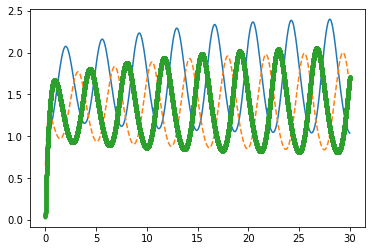

In [17]:
from IPython.display import display, Latex, Math
from random import gauss
import numpy as np
import matplotlib.pyplot as plt
# biological parameters
nHill=3;
alpha_r=5;
alpha_p=4
alpha_s=6;
# Numerical integration parameters and variables: timestep, max time, number of points
delta_t=0.001
tmax=30
N=30000
R = np.zeros(N+1)
P = np.zeros(N+1)
S = np.zeros(N+1)
T = np.zeros(N+1)
# Initial state: we start with some proteins of each type, randomly picked between 0 and 1 (in units of their "threshold value")
R[0]=np.random.uniform(0,1)
P[0]=np.random.uniform(0,1)
S[0]=np.random.uniform(0,1)

for i in range(0,N):  # Python starts indexing rows and columns at 0, not 1 as in the algorithm above 
    # and performs the last iteration at the last element BEFORE the end of range (i.e. here, i=N-1)
    T[i] = i*delta_t
for i in range(0,N):
    # First Runge Kutta step for all variables
    k11=-(R[i])+alpha_r/(1+(P[i])**(nHill)) # Powers in Python are **
    k12=-(P[i])+alpha_p/(1+(S[i])**(nHill))
    k13=-(S[i])+alpha_s/(1+(R[i])**(nHill))
    # Second Runge Kutta step for all variables using values from step 1
    k21=-(R[i]+0.5*delta_t*k11)+alpha_r/(1+(P[i]+0.5*delta_t*k12)**(nHill))
    k22=-(P[i]+0.5*delta_t*k12)+alpha_p/(1+(S[i]+0.5*delta_t*k13)**(nHill))
    k23=-(S[i]+0.5*delta_t*k13)+alpha_s/(1+(R[i]+0.5*delta_t*k11)**(nHill))
    # Third Runge Kutta step for all variables using values from step 2
    k31=-(R[i]+0.5*delta_t*k21)+alpha_r/(1+(P[i]+0.5*delta_t*k22)**(nHill))
    k32=-(P[i]+0.5*delta_t*k22)+alpha_p/(1+(S[i]+0.5*delta_t*k23)**(nHill))
    k33=-(S[i]+0.5*delta_t*k23)+alpha_s/(1+(R[i]+0.5*delta_t*k21)**(nHill))
    # Fourth Runge Kutta step for all variables using values from step 3
    k41=-(R[i]+delta_t*k31)+alpha_r/(1+(P[i]+delta_t*k32)**(nHill))
    k42=-(P[i]+delta_t*k32)+alpha_p/(1+(S[i]+delta_t*k33)**(nHill))
    k43=-(S[i]+delta_t*k33)+alpha_s/(1+(R[i]+delta_t*k31)**(nHill))
    # Final Runge Kutta averaging 
    R[i+1]=R[i]+delta_t*(k11+2*k21+2*k31+k41)/6
    P[i+1]=P[i]+delta_t*(k12+2*k22+2*k32+k42)/6
    S[i+1]=S[i]+delta_t*(k13+2*k23+2*k33+k43)/6
    
T[N]=(N)*delta_t
    
# plot the time variations of all the node values
plt.close()
plt.figure()
plt.plot(T,R,'-')
plt.plot(T,P,'--')
plt.plot(T,S,'.-')
plt.show()



### Conclusions: 
- A minimal Hill coefficient is required, seems to depend on the $\alpha$ rescaled rates
- R, P, and S expression are always out of phase
- Oscillation amplitude depends on the relative balance between the $\alpha$ rescaled rates
- Oscillations damped if at least one rate of order 1 or less... ALL proteins need to be synthesized and couple faster than beind degraded for the oscillations to be maintained...
- **Same qualitative conclusion as with our toy linear model!**
- The stronger the coupling (and faster synthesis rates), the larger the oscillation period
- Little sensitivity to fine tuning of individual parameters: provides **Robustness**
- ...To Be Completed


## What if?
What if we use another function than the Hill function?
Let's try a few of them. 

For instance the inverse proportionality law:

$$\frac{d\hat r}{d\hat t}=\frac{\hat \alpha_r}{\hat p}-\hat r \\ \frac{d\hat p}{d\hat t}=\frac{\hat \alpha_p}{\hat s}-\hat p \\ \frac{ds}{d\hat t}=\frac{\hat \alpha_s}{\hat r}-\hat s $$



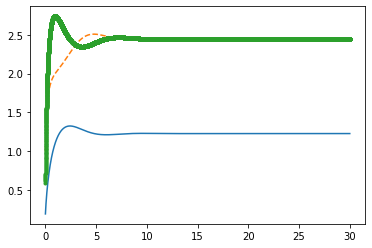

In [16]:
from IPython.display import display, Latex, Math
from random import gauss
import numpy as np
import matplotlib.pyplot as plt
# biological parameters
alpha_r=3;
alpha_p=6;
alpha_s=3;
# Numerical integration parameters and variables: timestep, max time, number of points
delta_t=0.001
tmax=30
N=30000
R = np.zeros(N+1)
P = np.zeros(N+1)
S = np.zeros(N+1)
T = np.zeros(N+1)
# Initial state: we start with some proteins of each type, randomly picked between 0 and 1 (in units of their "threshold value")
R[0]=np.random.uniform(0,1)
P[0]=np.random.uniform(0,1)
S[0]=np.random.uniform(0,1)

for i in range(0,N):  # Python starts indexing rows and columns at 0, not 1 as in the algorithm above 
    # and performs the last iteration at the last element BEFORE the end of range (i.e. here, i=N-1)
    T[i] = i*delta_t
for i in range(0,N):
    # First Runge Kutta step for all variables
    k11=-(R[i])+alpha_r/(P[i]) # Powers in Python are **
    k12=-(P[i])+alpha_p/(S[i])
    k13=-(S[i])+alpha_s/(R[i])
    # Second Runge Kutta step for all variables using values from step 1
    k21=-(R[i]+0.5*delta_t*k11)+alpha_r/(P[i]+0.5*delta_t*k12)
    k22=-(P[i]+0.5*delta_t*k12)+alpha_p/(S[i]+0.5*delta_t*k13)
    k23=-(S[i]+0.5*delta_t*k13)+alpha_s/(R[i]+0.5*delta_t*k11)
    # Third Runge Kutta step for all variables using values from step 2
    k31=-(R[i]+0.5*delta_t*k21)+alpha_r/(P[i]+0.5*delta_t*k22)
    k32=-(P[i]+0.5*delta_t*k22)+alpha_p/(S[i]+0.5*delta_t*k23)
    k33=-(S[i]+0.5*delta_t*k23)+alpha_s/(R[i]+0.5*delta_t*k21)
    # Fourth Runge Kutta step for all variables using values from step 3
    k41=-(R[i]+delta_t*k31)+alpha_r/(P[i]+delta_t*k32)
    k42=-(P[i]+delta_t*k32)+alpha_p/(S[i]+delta_t*k33)
    k43=-(S[i]+delta_t*k33)+alpha_s/(R[i]+delta_t*k31)
    # Final Runge Kutta averaging 
    R[i+1]=R[i]+delta_t*(k11+2*k21+2*k31+k41)/6
    P[i+1]=P[i]+delta_t*(k12+2*k22+2*k32+k42)/6
    S[i+1]=S[i]+delta_t*(k13+2*k23+2*k33+k43)/6
    
T[N]=(N)*delta_t
    
# plot the time variations of all the node values
plt.close()
plt.figure()
plt.plot(T,R,'-')
plt.plot(T,P,'--')
plt.plot(T,S,'.-')
plt.show()



#### Conclusions: 
- Oscillations rapidly damped. This mathematical formulation of the inhibitory arrows in the graphical model is not good to yield sustained oscillations. Why? We have seen in the previous situation that a **minimal Hill coefficient was required** to get sustained oscillations. In other words, the repression of gene expression needs to be **sensitive enough** to changes in the levels of the repressive protein. The inverse proportionality function, that reduces 2-fold the synthesis rate if the amount of repressive protein increases 2-fold, is not **strong enough**. It can be viewed, to some extent, as a Hill function with small Hill exponent $n=1$.
- This is an important lesson: it is always good to compare several modeling approaches of the same biological mechanism.
- What other conclusions do you make, based on playing with parameters?

or the exponential decay (optional):

$$\frac{d\hat r}{d\hat t}=\hat \alpha_r*e^{-\hat p}-\hat r \\ \frac{d\hat p}{d\hat t}=\hat \alpha_p*e^{-\hat s}-\hat p \\ \frac{ds}{d\hat t}=\hat \alpha_s*e^{-\hat r}-\hat s $$


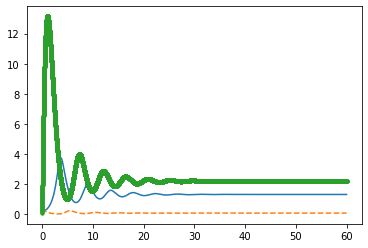

In [19]:
from IPython.display import display, Latex, Math
from random import gauss
import numpy as np
import matplotlib.pyplot as plt
# biological parameters
alpha_r=0.1;
alpha_p=0.6;
alpha_s=6;
# Numerical integration parameters and variables: timestep, max time, number of points
delta_t=0.001
tmax=60
N=60000
R = np.zeros(N+1)
P = np.zeros(N+1)
S = np.zeros(N+1)
T = np.zeros(N+1)
# Initial state: we start with some proteins of each type, randomly picked between 0 and 1 (in units of their "threshold value")
R[0]=np.random.uniform(0,1)
P[0]=np.random.uniform(0,1)
S[0]=np.random.uniform(0,1)

for i in range(0,N):  # Python starts indexing rows and columns at 0, not 1 as in the algorithm above 
    # and performs the last iteration at the last element BEFORE the end of range (i.e. here, i=N-1)
    T[i] = i*delta_t
for i in range(0,N):
    # First Runge Kutta step for all variables
    k11=-(R[i])+alpha_r/np.expm1(P[i]) # Powers in Python are **
    k12=-(P[i])+alpha_p/np.expm1(S[i])
    k13=-(S[i])+alpha_s/np.expm1(R[i])
    # Second Runge Kutta step for all variables using values from step 1
    k21=-(R[i]+0.5*delta_t*k11)+alpha_r/np.expm1(P[i]+0.5*delta_t*k12)
    k22=-(P[i]+0.5*delta_t*k12)+alpha_p/np.expm1(S[i]+0.5*delta_t*k13)
    k23=-(S[i]+0.5*delta_t*k13)+alpha_s/np.expm1(R[i]+0.5*delta_t*k11)
    # Third Runge Kutta step for all variables using values from step 2
    k31=-(R[i]+0.5*delta_t*k21)+alpha_r/np.expm1(P[i]+0.5*delta_t*k22)
    k32=-(P[i]+0.5*delta_t*k22)+alpha_p/np.expm1(S[i]+0.5*delta_t*k23)
    k33=-(S[i]+0.5*delta_t*k23)+alpha_s/np.expm1(R[i]+0.5*delta_t*k21)
    # Fourth Runge Kutta step for all variables using values from step 3
    k41=-(R[i]+delta_t*k31)+alpha_r/np.expm1(P[i]+delta_t*k32)
    k42=-(P[i]+delta_t*k32)+alpha_p/np.expm1(S[i]+delta_t*k33)
    k43=-(S[i]+delta_t*k33)+alpha_s/np.expm1(R[i]+delta_t*k31)
    # Final Runge Kutta averaging 
    R[i+1]=R[i]+delta_t*(k11+2*k21+2*k31+k41)/6
    P[i+1]=P[i]+delta_t*(k12+2*k22+2*k32+k42)/6
    S[i+1]=S[i]+delta_t*(k13+2*k23+2*k33+k43)/6
    
T[N]=(N)*delta_t
    
# plot the time variations of all the node values
plt.close()
plt.figure()
plt.plot(T,R,'-')
plt.plot(T,P,'--')
plt.plot(T,S,'.-')
plt.show()



#### Conclusions: 
- Oscillations, also R, P, and S expression out of phase. The exponential function, unlike the inverse function above, is **sensitive enough** to small changes in repressor protein levels. 
- If coefficients (synthesis rate) not sufficient, oscillations are damped (one slow rate, around or less than 1, is sufficient)
- Period of oscillations increases if $\alpha$ rescaled rates increased
- Relative peak amplitude of each protein depend on relative balance beween the $\alpha$ rescaled rates

## What does Elowitz model do that ours don't?
We don't know. Do you?

# Playing with Model structure
The example above demonstrates that, under some circumstances like a sufficient **sensitivity** (Hill coefficient) in the inhibition, the triple-negative feedback loop was sufficient to generate **out of phase oscillations** between 3 mutually inhibiting components like Rock, Paper and Scissors. But since we are discussing **elementary network structures**, are there other structures that can provide such oscillations?

## Double- not triple- negative feedback (mutual inhibition)
Let's first look at a double- (not triple) negative feedback: two genes, mutually inhibiting each other. According to what we discussed above, the equations for such a model would be something like:

$$\frac{d\hat r}{d\hat t}=\frac{\hat \alpha_r}{1+\hat p^n}-\hat r \\ \frac{d\hat p}{d\hat t}=\frac{\hat \alpha_p}{1+\hat r^n}-\hat p $$

Below a Runge Kutta code solving this model, similar to the 3 gene Repressilator.

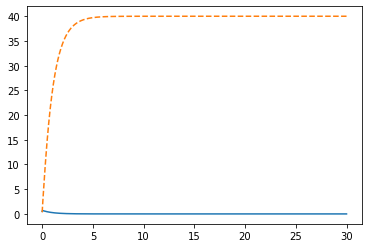

In [20]:
from IPython.display import display, Latex, Math
from random import gauss
import numpy as np
import matplotlib.pyplot as plt
# biological parameters
nHill=5;
alpha_r=10;
alpha_p=40;
# Numerical integration parameters and variables: timestep, max time, number of points
delta_t=0.001
tmax=30
N=30000
R = np.zeros(N+1)
P = np.zeros(N+1)
T = np.zeros(N+1)
# Initial state: we start with some proteins of each type, randomly picked between 0 and 1 (in units of their "threshold value")
R[0]=np.random.uniform(0,1)
P[0]=np.random.uniform(0,1)

for i in range(0,N):  # Python starts indexing rows and columns at 0, not 1 as in the algorithm above 
    # and performs the last iteration at the last element BEFORE the end of range (i.e. here, i=N-1)
    T[i] = i*delta_t
for i in range(0,N):
    # First Runge Kutta step for all variables
    k11=-(R[i])+alpha_r/(1+(P[i])**(nHill)) # Powers in Python are **
    k12=-(P[i])+alpha_p/(1+(R[i])**(nHill))
    # Second Runge Kutta step for all variables using values from step 1
    k21=-(R[i]+0.5*delta_t*k11)+alpha_r/(1+(P[i]+0.5*delta_t*k12)**(nHill))
    k22=-(P[i]+0.5*delta_t*k12)+alpha_p/(1+(R[i]+0.5*delta_t*k13)**(nHill))
    # Third Runge Kutta step for all variables using values from step 2
    k31=-(R[i]+0.5*delta_t*k21)+alpha_r/(1+(P[i]+0.5*delta_t*k22)**(nHill))
    k32=-(P[i]+0.5*delta_t*k22)+alpha_p/(1+(R[i]+0.5*delta_t*k23)**(nHill))
    # Fourth Runge Kutta step for all variables using values from step 3
    k41=-(R[i]+delta_t*k31)+alpha_r/(1+(P[i]+delta_t*k32)**(nHill))
    k42=-(P[i]+delta_t*k32)+alpha_p/(1+(R[i]+delta_t*k33)**(nHill))
    # Final Runge Kutta averaging 
    R[i+1]=R[i]+delta_t*(k11+2*k21+2*k31+k41)/6
    P[i+1]=P[i]+delta_t*(k12+2*k22+2*k32+k42)/6
    
T[N]=(N)*delta_t
    
# plot the time variations of all the node values
plt.close()
plt.figure()
plt.plot(T,R,'-')
plt.plot(T,P,'--')
plt.show()

We find that for any choice of parameter values, the model converges towards a state where one protein is expressed and other is not. Hence, this double negative feedback cannot, in the framework of a gene expression model with Hill-like repression, generate spontaneous oscillations. It is possible to show using the linear version of such a model that the matrix does not have any complex-valued eigenvalues, hence the **absence of oscillations**.

## Additional elements
Below we are looking at different elementary network elements. For convenience, we use Hill functions to mathematically implement all inhibition-activation interactions, as we've seen the exact mathematical formulation does not matter that much. 

### Triple loop with two positive and one negative feedback (optional)
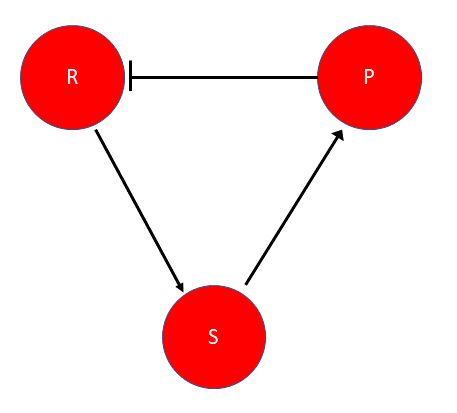

Here, we assume that P inhibits R, but in return **R activates S** and **S activates P**. We can use the same equations  than in the Rock-Paper-Scissors model of triple inhibition, however in the equations for P and for S, the *inhibiting* Hill functions $f(x)=\frac{1}{1+\hat x^n}$ are replaced by *activating* Hill functions $f(x)=\frac{\hat x^n}{1+\hat x^n}$ that **increase** when the expression of the activating protein $x$ increases

$$\frac{d\hat r}{d\hat t}=\frac{\hat \alpha_r}{1+\hat p^n}-\hat r \\ \frac{d\hat p}{d\hat t}=\frac{\hat \alpha_p \hat s^n}{1+\hat s^n}-\hat p \\ \frac{ds}{d\hat t}=\frac{\hat \alpha_s \hat r^n}{1+\hat r^n}-\hat s $$

Using the following code, we can simulate the dynamics of this model for different values of the rescaled parameters.

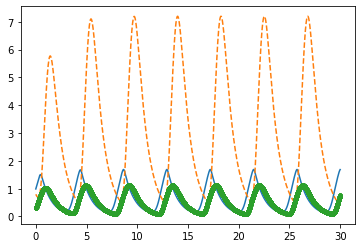

In [3]:
from IPython.display import display, Latex, Math
from random import gauss
import numpy as np
import matplotlib.pyplot as plt
# biological parameters
nHill=5;
alpha_r=3;
alpha_p=20;
alpha_s=2;
# Numerical integration parameters and variables: timestep, max time, number of points
delta_t=0.001
tmax=30
N=30000
R = np.zeros(N+1)
P = np.zeros(N+1)
S = np.zeros(N+1)
T = np.zeros(N+1)
# Initial state: we start with some proteins of each type, randomly picked between 0 and 1 (in units of their "threshold value")
R[0]=np.random.uniform(0,1)
P[0]=np.random.uniform(0,1)
S[0]=np.random.uniform(0,1)

for i in range(0,N):  # Python starts indexing rows and columns at 0, not 1 as in the algorithm above 
    # and performs the last iteration at the last element BEFORE the end of range (i.e. here, i=N-1)
    T[i] = i*delta_t
for i in range(0,N):
    # First Runge Kutta step for all variables
    k11=-(R[i])+alpha_r/(1+(P[i])**(nHill)) # Powers in Python are **
    k12=-(P[i])+alpha_p*(S[i])**(nHill)/(1+(S[i])**(nHill))
    k13=-(S[i])+alpha_s*(R[i])**(nHill)/(1+(R[i])**(nHill))
    # Second Runge Kutta step for all variables using values from step 1
    k21=-(R[i]+0.5*delta_t*k11)+alpha_r/(1+(P[i]+0.5*delta_t*k12)**(nHill))
    k22=-(P[i]+0.5*delta_t*k12)+alpha_p*(S[i]+0.5*delta_t*k13)**(nHill)/(1+(S[i]+0.5*delta_t*k13)**(nHill))
    k23=-(S[i]+0.5*delta_t*k13)+alpha_s*(R[i]+0.5*delta_t*k11)**(nHill)/(1+(R[i]+0.5*delta_t*k11)**(nHill))
    # Third Runge Kutta step for all variables using values from step 2
    k31=-(R[i]+0.5*delta_t*k21)+alpha_r/(1+(P[i]+0.5*delta_t*k22)**(nHill))
    k32=-(P[i]+0.5*delta_t*k22)+alpha_p*(S[i]+0.5*delta_t*k23)**(nHill)/(1+(S[i]+0.5*delta_t*k23)**(nHill))
    k33=-(S[i]+0.5*delta_t*k23)+alpha_s*(R[i]+0.5*delta_t*k21)**(nHill)/(1+(R[i]+0.5*delta_t*k21)**(nHill))
    # Fourth Runge Kutta step for all variables using values from step 3
    k41=-(R[i]+delta_t*k31)+alpha_r/(1+(P[i]+delta_t*k32)**(nHill))
    k42=-(P[i]+delta_t*k32)+alpha_p*(S[i]+delta_t*k33)**(nHill)/(1+(S[i]+delta_t*k33)**(nHill))
    k43=-(S[i]+delta_t*k33)+alpha_s*(R[i]+delta_t*k31)**(nHill)/(1+(R[i]+delta_t*k31)**(nHill))
    # Final Runge Kutta averaging 
    R[i+1]=R[i]+delta_t*(k11+2*k21+2*k31+k41)/6
    P[i+1]=P[i]+delta_t*(k12+2*k22+2*k32+k42)/6
    S[i+1]=S[i]+delta_t*(k13+2*k23+2*k33+k43)/6
    
T[N]=(N)*delta_t
    
# plot the time variations of all the node values
plt.close()
plt.figure()
plt.plot(T,R,'-')
plt.plot(T,P,'--')
plt.plot(T,S,'.-')
plt.show()


... and we recover the oscillatory dynamics of the Repressilator. Hence, from a functional point of view, two positive feedback interactions coupled to a negative feedback interaction in a **loop** is equivalent to the triple negative feedback loop. But what if one node of the network feeds positively into two nodes, coupled together by negative feedback?

### Incoherent feedforward motif
Let's confront our mathematical dynamical analysis to one of the motifs we have seen in the first section: the incoherent feedforward loop, where a node S activates directly a node R but also, inactivate it indirectly through another node P:

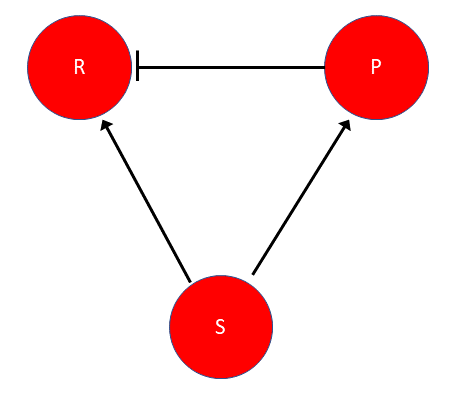

In the case of this network elements, the equations could be:

$$\frac{d\hat r}{d\hat t}=\frac{\hat \alpha_r}{1+\hat p^n}*\frac{\hat s^n}{1+\hat s^n}-\hat r \\ \frac{d\hat p}{d\hat t}=\frac{\hat \alpha_p \hat s^n}{1+\hat s^n}-\hat p \\ \frac{d \hat s}{d\hat t}=-\hat s $$

as long as there is no signal upstream of S (a "source"). The synthesis rate of Rock $\frac{\hat \alpha_r}{1+\hat p^n}*\frac{\hat s^n}{1+\hat s^n}$ mathematically implements the AND function (multiplication between the two Hill functions), and expresses the biological fact that P inhibits R regardless of the levels of S (that activates R), and vice-versa. 

Since, in the third equation, there is no positive contribution to $\frac{d \hat s}{d\hat t}$, the dynamics of the system at very large times are easy to guess: $\hat s$ will exponentially decrease to 0, leading to the disappearance of the positive terms in $\frac{d \hat p}{d\hat t}$ and in $\frac{d \hat r}{d\hat t}$ and thus, to the gradual decay of both $\hat p$ and $\hat r$ to 0 as well. Let's see if our analysis was right, and simulate the dynamics of this model for different values of the rescaled parameters.



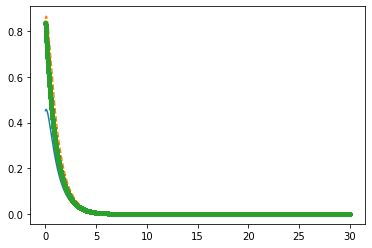

In [21]:
from IPython.display import display, Latex, Math
from random import gauss
import numpy as np
import matplotlib.pyplot as plt
# biological parameters
nHill=5;
alpha_r=3;
alpha_p=4;
# Numerical integration parameters and variables: timestep, max time, number of points
delta_t=0.001
tmax=30
N=30000
R = np.zeros(N+1)
P = np.zeros(N+1)
S = np.zeros(N+1)
T = np.zeros(N+1)
# Initial state: we start with some proteins of each type, randomly picked between 0 and 1 (in units of their "threshold value")
R[0]=np.random.uniform(0,1)
P[0]=np.random.uniform(0,1)
S[0]=np.random.uniform(0,1)

for i in range(0,N):  # Python starts indexing rows and columns at 0, not 1 as in the algorithm above 
    # and performs the last iteration at the last element BEFORE the end of range (i.e. here, i=N-1)
    T[i] = i*delta_t
for i in range(0,N):
    # First Runge Kutta step for all variables
    k11=-(R[i])+alpha_r/(1+(P[i])**(nHill))*(S[i])**(nHill)/(1+(S[i])**(nHill)) # Powers in Python are **
    k12=-(P[i])+alpha_p*(S[i])**(nHill)/(1+(S[i])**(nHill))
    k13=-(S[i])
    # Second Runge Kutta step for all variables using values from step 1
    k21=-(R[i]+0.5*delta_t*k11)+alpha_r/(1+(P[i]+0.5*delta_t*k12)**(nHill))*(S[i]+0.5*delta_t*k13)**(nHill)/(1+(S[i]+0.5*delta_t*k13)**(nHill))
    k22=-(P[i]+0.5*delta_t*k12)+alpha_p*(S[i]+0.5*delta_t*k13)**(nHill)/(1+(S[i]+0.5*delta_t*k13)**(nHill))
    k23=-(S[i]+0.5*delta_t*k13)
    # Third Runge Kutta step for all variables using values from step 2
    k31=-(R[i]+0.5*delta_t*k21)+alpha_r/(1+(P[i]+0.5*delta_t*k22)**(nHill))*(S[i]+0.5*delta_t*k23)**(nHill)/(1+(S[i]+0.5*delta_t*k23)**(nHill))
    k32=-(P[i]+0.5*delta_t*k22)+alpha_p*(S[i]+0.5*delta_t*k23)**(nHill)/(1+(S[i]+0.5*delta_t*k23)**(nHill))
    k33=-(S[i]+0.5*delta_t*k23)
    # Fourth Runge Kutta step for all variables using values from step 3
    k41=-(R[i]+delta_t*k31)+alpha_r/(1+(P[i]+delta_t*k32)**(nHill))*(S[i]+delta_t*k33)**(nHill)/(1+(S[i]+delta_t*k33)**(nHill))
    k42=-(P[i]+delta_t*k32)+alpha_p*(S[i]+delta_t*k33)**(nHill)/(1+(S[i]+delta_t*k33)**(nHill))
    k43=-(S[i]+delta_t*k33)
    # Final Runge Kutta averaging 
    R[i+1]=R[i]+delta_t*(k11+2*k21+2*k31+k41)/6
    P[i+1]=P[i]+delta_t*(k12+2*k22+2*k32+k42)/6
    S[i+1]=S[i]+delta_t*(k13+2*k23+2*k33+k43)/6
    
T[N]=(N)*delta_t
    
# plot the time variations of all the node values
plt.close()
plt.figure()
plt.plot(T,R,'-')
plt.plot(T,P,'--')
plt.plot(T,S,'.-')
plt.show()


**Indeed**. Not very interesting. So let's consider now that the upstreammost node of the incoherent FFL, the node S, is stimulated by a signal $S_s$ like in the Alon paper discussed in the first section:

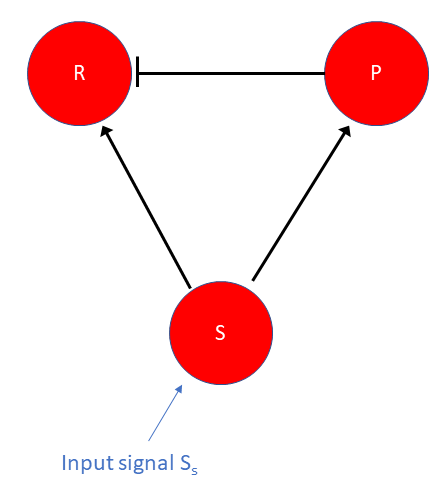

The equations describing the dynamics of this network motif are then something like:

$$\frac{d\hat r}{d\hat t}=\frac{\hat \alpha_r}{1+\hat p^n}*\frac{\hat s^n}{1+\hat s^n}-\hat r \\ \frac{d\hat p}{d\hat t}=\frac{\hat \alpha_p \hat s^n}{1+\hat s^n}-\hat p \\ \frac{d \hat s}{d\hat t}=S_s-\hat s $$

Let's simulate this module with the same script as above:

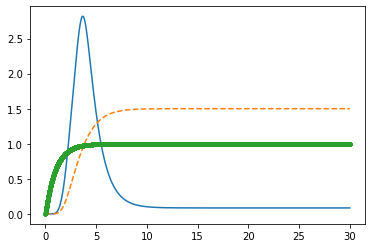

In [28]:
from IPython.display import display, Latex, Math
from random import gauss
import numpy as np
import matplotlib.pyplot as plt
# biological parameters
nHill=10;
alpha_r=10;
alpha_p=3;
Ss=1;
# Numerical integration parameters and variables: timestep, max time, number of points
delta_t=0.001
tmax=30
N=30000
R = np.zeros(N+1)
P = np.zeros(N+1)
S = np.zeros(N+1)
T = np.zeros(N+1)
# Initial state: we start with some proteins of each type, randomly picked between 0 and 1 (in units of their "threshold value")
R[0]=0#np.random.uniform(0,1)
P[0]=0#np.random.uniform(0,1)
S[0]=0#np.random.uniform(0,1)

for i in range(0,N):  # Python starts indexing rows and columns at 0, not 1 as in the algorithm above 
    # and performs the last iteration at the last element BEFORE the end of range (i.e. here, i=N-1)
    T[i] = i*delta_t
for i in range(0,N):
    # First Runge Kutta step for all variables
    k11=-(R[i])+alpha_r/(1+(P[i])**(nHill))*(S[i])**(nHill)/(1+(S[i])**(nHill)) # Powers in Python are **
    k12=-(P[i])+alpha_p*(S[i])**(nHill)/(1+(S[i])**(nHill))
    k13=Ss-(S[i])
    # Second Runge Kutta step for all variables using values from step 1
    k21=-(R[i]+0.5*delta_t*k11)+alpha_r/(1+(P[i]+0.5*delta_t*k12)**(nHill))*(S[i]+0.5*delta_t*k13)**(nHill)/(1+(S[i]+0.5*delta_t*k13)**(nHill))
    k22=-(P[i]+0.5*delta_t*k12)+alpha_p*(S[i]+0.5*delta_t*k13)**(nHill)/(1+(S[i]+0.5*delta_t*k13)**(nHill))
    k23=Ss-(S[i]+0.5*delta_t*k13)
    # Third Runge Kutta step for all variables using values from step 2
    k31=-(R[i]+0.5*delta_t*k21)+alpha_r/(1+(P[i]+0.5*delta_t*k22)**(nHill))*(S[i]+0.5*delta_t*k23)**(nHill)/(1+(S[i]+0.5*delta_t*k23)**(nHill))
    k32=-(P[i]+0.5*delta_t*k22)+alpha_p*(S[i]+0.5*delta_t*k23)**(nHill)/(1+(S[i]+0.5*delta_t*k23)**(nHill))
    k33=Ss-(S[i]+0.5*delta_t*k23)
    # Fourth Runge Kutta step for all variables using values from step 3
    k41=-(R[i]+delta_t*k31)+alpha_r/(1+(P[i]+delta_t*k32)**(nHill))*(S[i]+delta_t*k33)**(nHill)/(1+(S[i]+delta_t*k33)**(nHill))
    k42=-(P[i]+delta_t*k32)+alpha_p*(S[i]+delta_t*k33)**(nHill)/(1+(S[i]+delta_t*k33)**(nHill))
    k43=Ss-(S[i]+delta_t*k33)
    # Final Runge Kutta averaging 
    R[i+1]=R[i]+delta_t*(k11+2*k21+2*k31+k41)/6
    P[i+1]=P[i]+delta_t*(k12+2*k22+2*k32+k42)/6
    S[i+1]=S[i]+delta_t*(k13+2*k23+2*k33+k43)/6
    
T[N]=(N)*delta_t
    
# plot the time variations of all the node values
plt.close()
plt.figure()
plt.plot(T,R,'-')
plt.plot(T,P,'--')
plt.plot(T,S,'.-')
plt.show()


And we recover the **pulse-generator** nature of the incoherent FFL: if the network parameters are such that upon stimulation of S, Rock level build up faster than Paper levels, then there will be a transient phase during which Rock expression is maximal, before Paper-mediated inhibition of Rock synthesis kicks in! Hence the generation of a short pulse in Rock synthesis. The steady level after the pulse, the high of the pulseand the duration of the pulse are all dependent on the parameters.

**Play** with the parameters in the script above to see how! Wouldn't it simpler to solve the equations analytically and get all conclusions **at one glance, looking at the final solution for $R(t)$?**

### Forced oscillations: the response of the Repressilator to an oscillatory input (optional)
We have seen above that the triple negative feedback loop and other functionally equivalent 3-nodes elementary network structures were capable of generating **spontaneous oscillations** in the biological variables. And spontaneous oscillations are indeed an important feature of our own organisms: experiments with mammals (rodents) kept in the dark or full light at constant temperature for several consecutive dayas have shown that, despite the absence of natural *circadian inputs* (e.g. sunlight, day/night temperature oscillations...), many biomolecules were secreted by the rodents in an oscillatory fashion (e.g., hormones). 

But how does a spontaneous oscillator reacts when it is **forced** to oscillate in response to a given pattern (for instance, alternating days and nights)?

The (short) answer is: it does oscillate, and to some extent follows the frequency of the input. 

The code below solves the original Repressilator model (See above), but considers that the synthesis rate of the Rock gene oscillated as a function of time: 


$$\frac{d\hat r}{d\hat t}=\frac{\hat \alpha_r*\frac{1+\cos(2*\pi*f*t)}{2}}{1+\hat p^n}-\hat r \\ \frac{d\hat p}{d\hat t}=\frac{\hat \alpha_p}{1+\hat s^n}-\hat p \\ \frac{ds}{d\hat t}=\frac{\hat \alpha_s}{1+\hat r^n}-\hat s $$

where $f$ is the oscillation frequency


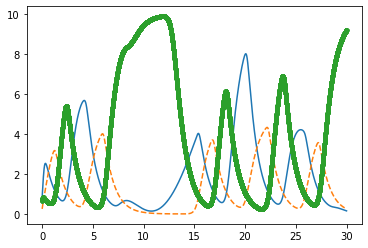

In [30]:
from IPython.display import display, Latex, Math
from random import gauss
import numpy as np
import matplotlib.pyplot as plt
# biological parameters
nHill=5;
alpha_r=10;
alpha_p=5
alpha_s=10;
freq=0.05;
omega=2*3.14159*freq;
# Numerical integration parameters and variables: timestep, max time, number of points
delta_t=0.001
tmax=30
N=30000
R = np.zeros(N+1)
P = np.zeros(N+1)
S = np.zeros(N+1)
T = np.zeros(N+1)
# Initial state: we start with some proteins of each type, randomly picked between 0 and 1 (in units of their "threshold value")
R[0]=np.random.uniform(0,1)
P[0]=np.random.uniform(0,1)
S[0]=np.random.uniform(0,1)

for i in range(0,N):  # Python starts indexing rows and columns at 0, not 1 as in the algorithm above 
    # and performs the last iteration at the last element BEFORE the end of range (i.e. here, i=N-1)
    T[i] = i*delta_t
for i in range(0,N):
    # First Runge Kutta step for all variables
    k11=-(R[i])+alpha_r*0.5*(1+np.cos(omega*T[i]))/(1+(P[i])**(nHill)) # Powers in Python are **
    k12=-(P[i])+alpha_p/(1+(S[i])**(nHill))
    k13=-(S[i])+alpha_s/(1+(R[i])**(nHill))
    # Second Runge Kutta step for all variables using values from step 1
    k21=-(R[i]+0.5*delta_t*k11)+alpha_r*0.5*(1+np.cos(omega*T[i]))/(1+(P[i]+0.5*delta_t*k12)**(nHill))
    k22=-(P[i]+0.5*delta_t*k12)+alpha_p/(1+(S[i]+0.5*delta_t*k13)**(nHill))
    k23=-(S[i]+0.5*delta_t*k13)+alpha_s/(1+(R[i]+0.5*delta_t*k11)**(nHill))
    # Third Runge Kutta step for all variables using values from step 2
    k31=-(R[i]+0.5*delta_t*k21)+alpha_r*0.5*(1+np.cos(omega*T[i]))/(1+(P[i]+0.5*delta_t*k22)**(nHill))
    k32=-(P[i]+0.5*delta_t*k22)+alpha_p/(1+(S[i]+0.5*delta_t*k23)**(nHill))
    k33=-(S[i]+0.5*delta_t*k23)+alpha_s/(1+(R[i]+0.5*delta_t*k21)**(nHill))
    # Fourth Runge Kutta step for all variables using values from step 3
    k41=-(R[i]+delta_t*k31)+alpha_r*0.5*(1+np.cos(omega*T[i]))/(1+(P[i]+delta_t*k32)**(nHill))
    k42=-(P[i]+delta_t*k32)+alpha_p/(1+(S[i]+delta_t*k33)**(nHill))
    k43=-(S[i]+delta_t*k33)+alpha_s/(1+(R[i]+delta_t*k31)**(nHill))
    # Final Runge Kutta averaging 
    R[i+1]=R[i]+delta_t*(k11+2*k21+2*k31+k41)/6
    P[i+1]=P[i]+delta_t*(k12+2*k22+2*k32+k42)/6
    S[i+1]=S[i]+delta_t*(k13+2*k23+2*k33+k43)/6
    
T[N]=(N)*delta_t
    
# plot the time variations of all the node values
plt.close()
plt.figure()
plt.plot(T,R,'-')
plt.plot(T,P,'--')
plt.plot(T,S,'.-')
plt.show()

